#**This is Colaboratory is owned by:**
###1.  Kopal Sharma (J045) 
###2.  Sagarika Raje (J074)
###3. Ujwal Shah (J078)

##**Subject: Deep Learning Final Project**

##**Topic: Breast Cancer Treatment Response Classification Based Flask App**

## **Importing Libraries and Pre-processing**

In [ ]:
!pip install pydicom

In [ ]:
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils import np_utils
from sklearn import linear_model
from sklearn.model_selection import cross_val_score, KFold, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, mean_squared_error, r2_score
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
import seaborn as sns
import time
import os
import cv2
import skimage.transform as st
import matplotlib.pyplot as plt
import pydicom 
from pydicom.data import get_testdata_files

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#Reading a Dataset Randomly to see how pydicom.dcmread works

dataset = pydicom.dcmread('/content/drive/My Drive/SM 2 Project/TRAIN_FINAL/NON-PCR/1-01 (1).dcm')

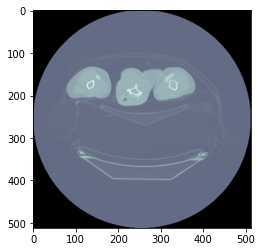

In [ ]:
# plot the image using matplotlib
plt.imshow(dataset.pixel_array, cmap=plt.cm.bone)
plt.show()

In [ ]:
dataset.pixel_array

array([[-2000, -2000, -2000, ..., -2000, -2000, -2000],
       [-2000, -2000, -2000, ..., -2000, -2000, -2000],
       [-2000, -2000, -2000, ..., -2000, -2000, -2000],
       ...,
       [-2000, -2000, -2000, ..., -2000, -2000, -2000],
       [-2000, -2000, -2000, ..., -2000, -2000, -2000],
       [-2000, -2000, -2000, ..., -2000, -2000, -2000]], dtype=int16)

In [ ]:
#Fixed Value of Dicom Images (512*512)

dataset.pixel_array.shape

(512, 512)

In [ ]:
del dataset



---



---



---



Steps for Loading Data 

1. Targeting the Respective Folder (Train or Test)
2. Passing it to "OS" to get its directory
3. Iterating it through every DICOM Image .
4. Passing it to Preprocessing
5. Saving Processed each & every image in their respective variable of Train & Test 

Preprocessing Done:
1. Checking if image is Read or Not.
2. Once the Image is Read then dividing it by 4096 to make it standardise.
3. Reshaping the Image to (512*512).

In [ ]:
#Loading TRAIN-PCR-DataSet

In [ ]:

folder="/content/drive/My Drive/SM 2 Project/TRAIN_FINAL/PCR"
train_pcr_images = []
y_train_pcr=[]
for filename in os.listdir(folder):
  img = np.array(pydicom.dcmread(os.path.join(folder,filename)).pixel_array)
  if img is not None:
    img=img/4096
    img = np.reshape(img,(512*512))
    train_pcr_images.append(img)
    y_train_pcr.append(0) 

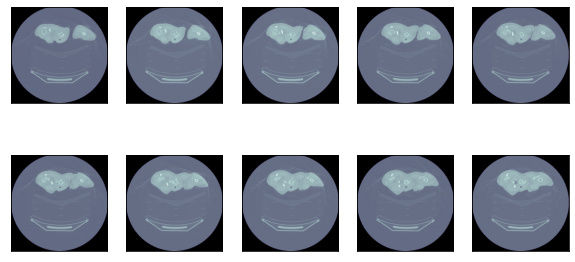

In [ ]:
#To show some images in a group
fig = plt.figure(figsize=(10, 5))
# plot several images
for i in range(10):#Showing 15 images
    ax = fig.add_subplot(2, 5, i + 1, xticks=[], yticks=[])
    ax.imshow(train_pcr_images[i].reshape(512, 512), cmap=plt.cm.bone)

In [ ]:
#Loading TRAIN-NON PCR-DataSet

In [ ]:
folder="/content/drive/My Drive/SM 2 Project/TRAIN_FINAL/NON-PCR"
train_nonpcr_images = []
y_train_nonpcr=[]
for filename in os.listdir(folder):
  img = np.array(pydicom.dcmread(os.path.join(folder,filename)).pixel_array)
  if img is not None:
    img=img/4096
    img=np.reshape(img,(512*512))
    train_nonpcr_images.append(img)
    y_train_nonpcr.append(1)

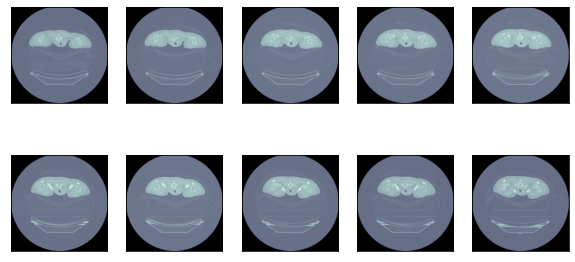

In [ ]:
#To show some images in a group
fig = plt.figure(figsize=(10, 5))
# plot several images
for i in range(10):#Showing 15 images
    ax = fig.add_subplot(2, 5, i + 1, xticks=[], yticks=[])
    ax.imshow(train_nonpcr_images[i].reshape(512, 512), cmap=plt.cm.bone)

In [ ]:
a=np.array(train_pcr_images)
print(a.shape)

b=np.array(train_nonpcr_images)
print(b.shape)

X_train=np.vstack((a, b))
print(X_train.shape)

(166, 262144)
(166, 262144)
(332, 262144)


In [ ]:
del a
del b
del img



---



---



In [ ]:
#Loading TEST-PCR-DataSet

In [ ]:
folder="/content/drive/My Drive/SM 2 Project/TEST_FINAL/pcr"

test_pcr_images = []
y_test_pcr=[]
for filename in os.listdir(folder):
  img = np.array(pydicom.dcmread(os.path.join(folder,filename)).pixel_array)
  if img is not None:
    img=img/4096
    img=np.reshape(img,(512*512))
    test_pcr_images.append(img)
    y_test_pcr.append(0)

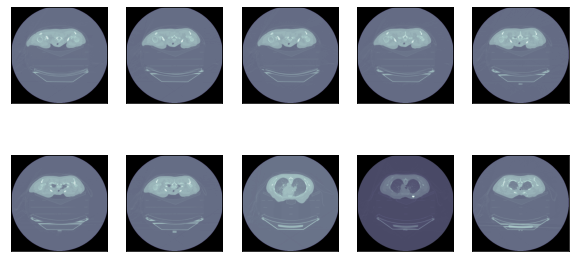

In [ ]:
#To show some images in a group
fig = plt.figure(figsize=(10, 5))
# plot several images
for i in range(10):#Showing 10 images
    ax = fig.add_subplot(2, 5, i + 1, xticks=[], yticks=[])
    ax.imshow(test_pcr_images[i].reshape(512, 512), cmap=plt.cm.bone)

In [ ]:
#Loading TEST-NON PCR-DataSet

In [ ]:
folder="/content/drive/My Drive/SM 2 Project/TEST_FINAL/non-pcr"

test_nonpcr_images = []
y_test_nonpcr=[]
for filename in os.listdir(folder):
  img = np.array(pydicom.dcmread(os.path.join(folder,filename)).pixel_array)
  if img is not None:
    img=img/4096
    img=np.reshape(img,(512*512))
    test_nonpcr_images.append(img)
    y_test_nonpcr.append(1)

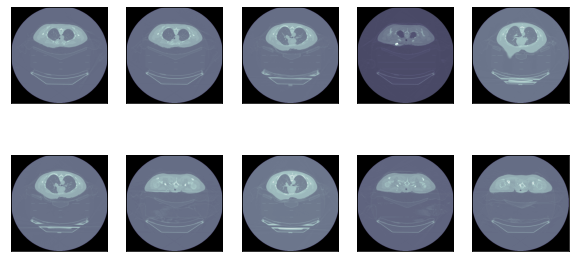

In [ ]:
#To show some images in a group
fig = plt.figure(figsize=(10, 5))
# plot several images
for i in range(10):#Showing 10 images
    ax = fig.add_subplot(2, 5, i + 1, xticks=[], yticks=[])
    ax.imshow(test_nonpcr_images[i].reshape(512, 512), cmap=plt.cm.bone)

In [ ]:
a=np.array(test_pcr_images)
print(a.shape)

b=np.array(test_nonpcr_images)
print(b.shape)

X_test=np.vstack((a, b))
print(X_test.shape)

(50, 262144)
(50, 262144)
(100, 262144)


In [ ]:
print("Total no of Train PCR images are : ",len(train_pcr_images))
print("Total no of Train NON-PCR images are : ",len(train_nonpcr_images))
print("Total no of Test PCR images are : ",len(test_pcr_images))
print("Total no of Test NON-PCR images are : ",len(test_nonpcr_images))

Total no of Train PCR images are :  166
Total no of Train NON-PCR images are :  166
Total no of Test PCR images are :  50
Total no of Test NON-PCR images are :  50


In [ ]:
del a 
del b
del img

In [ ]:
del train_pcr_images
del train_nonpcr_images
del test_pcr_images
del test_nonpcr_images



---



---



---



In [ ]:
#-----------------------------TRAIN---------------------------------
y_train_pcr_array=np.array(y_train_pcr)
print(y_train_pcr_array.shape)
y_train_nonpcr_array=np.array(y_train_nonpcr)
print(y_train_nonpcr_array.shape)
Y_train=np.concatenate((y_train_pcr_array,y_train_nonpcr_array))
print(Y_train.shape)
print(Y_train)

#--------------------------TEST----------------------------------------
y_test_pcr_array=np.array(y_test_pcr)
print(y_test_pcr_array.shape)
y_test_nonpcr_array=np.array(y_test_nonpcr)
print(y_test_nonpcr_array.shape)
Y_test=np.concatenate((y_test_pcr_array,y_test_nonpcr_array))
print(Y_test.shape)
print(Y_test)

(166,)
(166,)
(332,)
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
(50,)
(50,)
(100,)
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [ ]:
del y_train_pcr_array
del y_train_nonpcr_array
del y_test_pcr_array
del y_test_nonpcr_array

## **Building Neural Networks**

In [ ]:
from keras import models
from keras import layers
from keras.utils import to_categorical

In [ ]:
X_train.shape

(332, 262144)

In [ ]:
Y_train = np.reshape(Y_train, (X_train.shape[0],1))

In [ ]:
Y_train.shape

(332, 1)

In [ ]:
Y_train

array([[0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
    

In [ ]:
Y_test = np.reshape(Y_test, (X_test.shape[0],1))

In [ ]:
print(X_test.shape)
print(Y_test.shape)

(100, 262144)
(100, 1)


In [ ]:
import keras
from keras import regularizers
from keras import optimizers
initializer = keras.initializers.glorot_normal()
from keras.callbacks import ModelCheckpoint, EarlyStopping
filepath = "final_model.h5"
checkpoint = ModelCheckpoint(filepath, monitor ='val_accuracy', verbose=1, save_best_only=True, mode='max')
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=15, min_delta=0.01, baseline=5)

callbacks_list = [checkpoint, es]

In [ ]:
nn=models.Sequential()

nn.add(layers.Dense(128,activation='relu',input_shape=(512*512,),kernel_initializer=initializer,bias_initializer=initializer))
nn.add(layers.Dropout(0.25))
nn.add(layers.Dense(64,activation='relu',kernel_initializer=initializer,bias_initializer=initializer))
nn.add(layers.Dropout(0.25))
nn.add(layers.Dense(32,activation='relu',kernel_initializer=initializer,bias_initializer=initializer))
nn.add(layers.Dense(1,activation='sigmoid'))

In [ ]:
nn.compile(optimizer="adam",loss="binary_crossentropy",metrics=['accuracy'])

In [ ]:
nn.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               33554560  
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                8256      
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 33        
Total params: 33,564,929
Trainable params: 33,564,929
Non-trainable params: 0
____________________________________________

In [ ]:
tic=time.clock()
history=nn.fit(X_train,Y_train,epochs=50,callbacks=callbacks_list,validation_data=(X_test,Y_test))
toc=time.clock()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  """Entry point for launching an IPython kernel.


Epoch 1/50
11/11 [==============================] - 4s 49ms/step - loss: 3.2935 - accuracy: 0.5292 - val_loss: 6.8338 - val_accuracy: 0.5000

Epoch 00001: val_accuracy improved from -inf to 0.50000, saving model to final_model.h5
Epoch 2/50
11/11 [==============================] - 0s 31ms/step - loss: 3.6748 - accuracy: 0.6516 - val_loss: 7.0740 - val_accuracy: 0.5000

Epoch 00002: val_accuracy did not improve from 0.50000
Epoch 3/50
11/11 [==============================] - 0s 32ms/step - loss: 1.3457 - accuracy: 0.7467 - val_loss: 3.3650 - val_accuracy: 0.3500

Epoch 00003: val_accuracy did not improve from 0.50000
Epoch 4/50
11/11 [==============================] - 0s 32ms/step - loss: 0.2869 - accuracy: 0.9102 - val_loss: 2.2614 - val_accuracy: 0.2100

Epoch 00004: val_accuracy did not improve from 0.50000
Epoch 5/50
11/11 [==============================] - 0s 30ms/step - loss: 0.0708 - accuracy: 0.9753 - val_loss: 3.6936 - val_accuracy: 0.3400

Epoch 00005: val_accuracy did not imp

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  This is separate from the ipykernel package so we can avoid doing imports until


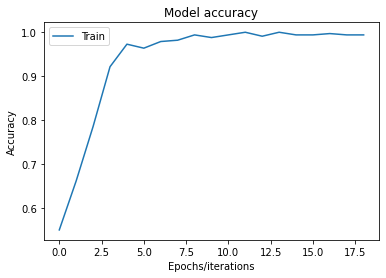

In [ ]:
#graphical representation of model accuracy
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.title("Model accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epochs/iterations")
plt.legend(['Train'], loc="upper left")
plt.show()

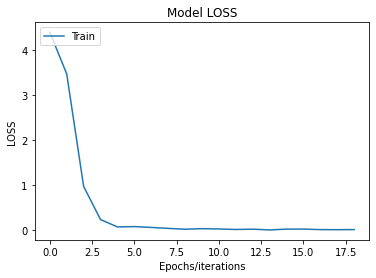

In [ ]:
#graphical representation of loss
plt.plot(history.history['loss'])
plt.title("Model LOSS")
plt.ylabel("LOSS")
plt.xlabel("Epochs/iterations")
plt.legend(['Train'], loc="upper left")
plt.show()

In [ ]:
from tensorflow import keras
model_new = keras.models.load_model("final_model.h5")

In [ ]:
model_new.evaluate(X_test, Y_test)

4/4 [==============================] - 0s 9ms/step - loss: 6.8338 - accuracy: 0.5000 


[6.833766460418701, 0.5]

## **Saving and Loading model**

In [ ]:
from tensorflow import keras
model = keras.models.load_model('/content/drive/MyDrive/SM 2 Project/final_model.h5')

In [ ]:
model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_19 (Dense)             (None, 128)               33554560  
_________________________________________________________________
dense_20 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_21 (Dense)             (None, 1)                 65        
Total params: 33,562,881
Trainable params: 33,562,881
Non-trainable params: 0
_________________________________________________________________


##**Deployment on Flask**

In [ ]:
!pip install flask gevent requests pillow

In [ ]:
procfile = 'web: gunicorn app:app'
procfiles= open("/content/Procfile","w")
procfiles.write(procfile)
procfiles.close()

In [ ]:
!pip install flask-ngrok
from flask_ngrok import run_with_ngrok
from flask import Flask

HTML File:

In [ ]:
a='''
<!DOCTYPE html>
<html>
<title>DIME - Disease Identification Made Easy</title>
<meta charset="UTF-8">
<meta name="viewport" content="width=device-width, initial-scale=1">
<link rel="stylesheet" href="https://www.w3schools.com/w3css/4/w3.css">
<link rel="stylesheet" href="https://fonts.googleapis.com/css?family=Raleway">
<link rel="stylesheet" href="https://cdnjs.cloudflare.com/ajax/libs/font-awesome/4.7.0/css/font-awesome.min.css">
<style>
body,h1,h2,h3,h4,h5,h6 {font-family: "Raleway", sans-serif}

body, html {
  height: 100%;
  line-height: 1.8;
}

/* Full height image header */
.bgimg-1 {
  background-position: center;
  background-size: cover;
  background-image: url("https://raw.githubusercontent.com/kopalsharma19/Breast-Cancer-Detection/main/Scan%20Images.png");
  min-height: 100%;
}

.w3-bar .w3-button {
  padding: 16px;
}
</style>
<body>

<!-- Navbar (sit on top) -->
<div class="w3-top">
  <div class="w3-bar w3-white w3-card" id="myNavbar">
    <a href="#home" class="w3-bar-item w3-button w3-wide">HOME</a>
    <!-- Right-sided navbar links -->
    <div class="w3-right w3-hide-small">
      <a href="#about" class="w3-bar-item w3-button">ABOUT</a>
      <a href="#team" class="w3-bar-item w3-button"><i class="fa fa-user"></i> TEAM</a>
      </div>
    <!-- Hide right-floated links on small screens and replace them with a menu icon -->

    <a href="javascript:void(0)" class="w3-bar-item w3-button w3-right w3-hide-large w3-hide-medium" onclick="w3_open()">
      <i class="fa fa-bars"></i>
    </a>
  </div>
</div>

<!-- Sidebar on small screens when clicking the menu icon -->
<nav class="w3-sidebar w3-bar-block w3-black w3-card w3-animate-left w3-hide-medium w3-hide-large" style="display:none" id="mySidebar">
  <a href="javascript:void(0)" onclick="w3_close()" class="w3-bar-item w3-button w3-large w3-padding-16">Close ×</a>
  <a href="#about" onclick="w3_close()" class="w3-bar-item w3-button">ABOUT</a>
  <a href="#team" onclick="w3_close()" class="w3-bar-item w3-button">TEAM</a>
  <a href="#work" onclick="w3_close()" class="w3-bar-item w3-button">WORK</a>
  <a href="#contact" onclick="w3_close()" class="w3-bar-item w3-button">CONTACT</a>
</nav>
<!-- Header with full-height image -->
<header class="bgimg-1 w3-display-container w3-grayscale-min" id="home">
  <div class="w3-display-left w3-text-white" style="padding:48px">
    <span class="w3-jumbo w3-hide-small">Breast Cancer Detection System</span><br>
    <span class="w3-large">On average, every 2 minutes a woman is diagnosed with breast cancer in the United States. More than 1 million cases of Breast Cancer are detected per year in India.Chemotherapy is an important part of the breast cancer treatment. New type of Chemotherapy used nowadays is Neoadjuvant chemotherapy. It is designed to be used prior to surgical removal of a tumor and has received significant attention.Pathological complete response (pCR) is defined as disappearance of all invasive cancer in the breast after completion of neoadjuvant chemotherapy.Non-Responder or progressive disease (Non-PCR) happens to high-risk patients who do not achieve a pathologic complete response after neoadjuvant chemotherapy in triple-negative breast cancer.</span>
    <br> 
    <br>   
    <span class ="w3-large">The aim of the present study was to identify and predict pCR or non-pCR response using Image Recognition Algorithms and other Deep Learning Algorithms.</span>
  <p><a href="#about" class="w3-button w3-white w3-padding-xxxsmall w3-large w3-opacity w3-hover-opacity-off">Click Here To Know How We Did It</a></p>
  </div> 
</header>
<div style="padding:48px">
    <span class="w3-xxlarge w3-hide-small">Try it out!</span>
    <br>
    <span class="w3-large">Upload CT Scan DICOM Image to identify PCR for Breast Cancer</span>
</div>

<div style="padding:48px">
 <form action="" method=post enctype=multipart/form-data>
        <input type=file name="file1">
        <input type=submit value="Submit the DICOM Image">
    </form>
    <br>
    <h5>CT Scan Classification - {{output}}</h5>
</div>

<!-- About Section -->
<div class="w3-container" style="padding:128px 16px" id="about">
  <h3 class="w3-center"><b>ABOUT THE TECHNIQUE</h3>
  <p class="w3-center w3-large">Key features of our Project</p>
  <div class="w3-row-padding w3-center" style="margin-top:64px">
    <div class="w3-quarter">
      <i class="fa fa-desktop w3-margin-bottom w3-jumbo w3-center"></i>
      <p class="w3-large">Algorithm</b></p>
      <p>We used Deep Learning Models to accurately classify PCR and Non-PCR CT Scans of breast cancer. We used DICOM Images as an input for our model. DICOM stands for The Digital Imaging and Communications in Medicine. Our decision to use these images in original format rather than jpeg and png format was to maintain the accuracy and specificity of the model.</p>
    </div>
    <div class="w3-quarter">
      <i class="fa fa-heart w3-margin-bottom w3-jumbo"></i>
      <p class="w3-large"><b>Passion</b></p>
      <p>We wish to create a society which is independent of the constraint of geographical distances for effective medical diagnosis. With increase in cost of radiologists and medicial facility, this initiative felt important. </p>
    </div>
    <div class="w3-quarter">
      <i class="fa fa-diamond w3-margin-bottom w3-jumbo"></i>
      <p class="w3-large"><b>Design</b></p>
      <p>It is extremely simple to use: Upload the CT Scan DICOM image & get the result. We believe that simplicity in design leads to more accessibility..</p>
    </div>
    <div class="w3-quarter">
      <i class="fa fa-cog w3-margin-bottom w3-jumbo"></i>
      <p class="w3-large"><b>Challenges</b></p>
      <p>Our main challenge was usage of DICOM images. DICOM images are themselves very large in size and it takes a long while to process them and train a model using them. Also to distinguish between PCR and Non-PCR </p>
    </div>
  </div>
</div>

<!-- Team Section -->
<div class="w3-container" style="padding:128px 16px" id="team">
  <h3 class="w3-center"><b>THE TEAM</h3>
  <p class="w3-center w3-large">The Ones who runs this Project</b></p>
  <div class="w3-row-padding" style="margin-top:64px">
    <div class="w3-col l3 m6 w3-margin-bottom">
      <div class="w3-card">
       <img src="https://raw.githubusercontent.com/kopalsharma19/Breast-Cancer-Detection/main/Ujwal%20Shah.jpg" alt="Ujwal" style="width:100%">
          <div class="w3-container">
          <h3><b>Ujwal Shah</b></h3>
          <p class="w3-opacity">Team Member</p>
          <p>Roll Number J078, Btech Data Science, Sem VI</p>
        </div>
      </div>
    </div>
    <div class="w3-col l3 m6 w3-margin-bottom">
      <div class="w3-card">
        <img src="https://raw.githubusercontent.com/kopalsharma19/Breast-Cancer-Detection/main/Kopal%20Sharma.jpg" alt="Kopal" style="width:100%">
        <div class="w3-container">
          <h3><b>Kopal Sharma</b></h3>
          <p class="w3-opacity">Team Member</p>
          <p>Roll Number J045, Btech Data Science, Sem VI</p>
        </div>
      </div>
    </div>
    <div class="w3-col l3 m6 w3-margin-bottom">
      <div class="w3-card">
        <img src="https://raw.githubusercontent.com/kopalsharma19/Breast-Cancer-Detection/main/Sagarika%20Raje.jpg" alt="Sagarika" style="width:100%">
        <div class="w3-container">
          <h3><b>Sagarika Raje</b></h3>
          <p class="w3-opacity">Team Member</p>
          <p>Roll Number J074, Btech Data Science, Sem VI</p>
        </div>
      </div>
    </div>
   </div>
</div>


<!-- Modal for full size images on click-->
<div id="modal01" class="w3-modal w3-black" onclick="this.style.display='none'">
  <span class="w3-button w3-xxlarge w3-black w3-padding-large w3-display-topright" title="Close Modal Image">×</span>
  <div class="w3-modal-content w3-animate-zoom w3-center w3-transparent w3-padding-64">
    <img id="img01" class="w3-image">
    <p id="caption" class="w3-opacity w3-large"></p>
  </div>
</div>
 
<script>
// Modal Image Gallery
function onClick(element) {
  document.getElementById("img01").src = element.src;
  document.getElementById("modal01").style.display = "block";
  var captionText = document.getElementById("caption");
  captionText.innerHTML = element.alt;
}


// Toggle between showing and hiding the sidebar when clicking the menu icon
var mySidebar = document.getElementById("mySidebar");

function w3_open() {
  if (mySidebar.style.display === 'block') {
    mySidebar.style.display = 'none';
  } else {
    mySidebar.style.display = 'block';
  }
}

// Close the sidebar with the close button
function w3_close() {
    mySidebar.style.display = "none";
}
</script>

</body>
</html>
'''

In [ ]:
!mkdir '/content/templates'
!mkdir '/content/uploads'

Html_file = open("/content/templates/index.html", "w")
Html_file.write(a)
Html_file.close()

mkdir: cannot create directory ‘/content/templates’: File exists
mkdir: cannot create directory ‘/content/uploads’: File exists


In [ ]:
!pip install pydicom

In [ ]:
import os
import cv2
import numpy as np
from flask import Flask, render_template, request
from keras.preprocessing import image
from keras.preprocessing.image import load_img, img_to_array
import pydicom 
from pydicom.data import get_testdata_files
from flask import Flask, render_template, redirect, url_for, request

app = Flask(__name__)
run_with_ngrok(app)
app.config['UPLOADS'] = 'uploads'

def load_mymodel():
    global mymodel
    mymodel = keras.models.load_model('/content/drive/MyDrive/SM 2 Project/final_model.h5')


@app.route('/')
def home():
    return render_template('index.html')

def predictions(file):
  img = np.array(pydicom.dcmread(file).pixel_array)
  if img is not None:
    img=img/4096
    img=np.reshape(img,(512*512))
    img = np.expand_dims(img, axis=0)
    ans=(mymodel.predict(img) > 0.5).astype("int32")
    return ans

@app.route('/', methods=['POST'])
def upload_files():
    file = request.files['file1']
    filepath = os.path.join(app.config['UPLOADS'], file.filename)
    file.save(filepath)
    output = predictions(filepath)
    if output.astype('int32') == 0:
      output = 'Its a PCR Image'
    elif output.astype('int32') == 1:
      output = 'Its a Non PCR Image'
    return render_template('index.html', output=output)

if __name__=='__main__':
    load_mymodel()
    app.run()

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://127.0.0.1:5000/ (Press CTRL+C to quit)


 * Running on http://86dd9cb5c690.ngrok.io
 * Traffic stats available on http://127.0.0.1:4040


127.0.0.1 - - [06/Apr/2021 17:33:01] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [06/Apr/2021 17:33:03] "GET /favicon.ico HTTP/1.1" 404 -
127.0.0.1 - - [06/Apr/2021 17:34:36] "POST / HTTP/1.1" 200 -
127.0.0.1 - - [06/Apr/2021 17:35:24] "POST / HTTP/1.1" 200 -


Thank you!